In [1]:
import pandas as pd
import numpy as np
import yaml
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [10]:

def version_to_run_config(unix_seconds: int):
    # "/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/run-20230718_002056-tka2fnu1/files/config.yaml"
    for child in os.listdir("/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/"):
        if not os.path.isdir(f"/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/{child}"):
            continue
        # check if unix_seconds is a substring of "save_name" of the in the config.yaml file
        # (if it exists)
        config_path = f"/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/{child}/files/config.yaml"
        with open(config_path, "r") as f:
            config = yaml.safe_load(f)
        if "save_name" in config:
            if str(unix_seconds) in config["save_name"]["value"]:
                return child, config
    return None, None

version_to_run_config(1690413778)
version_to_run = {
    "1690413778": {
        "wandb": "https://wandb.ai/latent-knowledge/weak-deception/runs/dvqqql8i",
        "lora-rank": 256,
        "kl-weight": 0.1,
        "objective": "standard",
        "lie-mode": "defier",
        "description": "6.4% of trainable parameters tuned."}}
"""
elk-reporters/deceptive-lora/v1690778461
elk-reporters/deceptive-lora/v1690778393
elk-reporters/deceptive-lora/v1690778555
elk-reporters/deceptive-lora/v1690782870
elk-reporters/deceptive-lora/v1690778323
elk-reporters/deceptive-lora/v1690778474
elk-reporters/deceptive-lora/v1690783020
elk-reporters/deceptive-lora/v1690778613
elk-reporters/deceptive-lora/v1690783068
elk-reporters/deceptive-lora/v1690778362
elk-reporters/deceptive-lora/v1690782859
elk-reporters/deceptive-lora/v1690783029
elk-reporters/deceptive-lora/v1690782886
elk-reporters/deceptive-lora/v1690782847
elk-reporters/deceptive-lora/v1690778333
elk-reporters/base-to-deceptive-lora/v1690778461
elk-reporters/base-to-deceptive-lora/v1690778393
elk-reporters/base-to-deceptive-lora/v1690778555
elk-reporters/base-to-deceptive-lora/v1690782870
elk-reporters/base-to-deceptive-lora/v1690778323
elk-reporters/base-to-deceptive-lora/v1690778474
elk-reporters/base-to-deceptive-lora/v1690783020
elk-reporters/base-to-deceptive-lora/v1690778613
elk-reporters/base-to-deceptive-lora/v1690783068
elk-reporters/base-to-deceptive-lora/v1690778362
elk-reporters/base-to-deceptive-lora/v1690782859
elk-reporters/base-to-deceptive-lora/v1690783029
elk-reporters/base-to-deceptive-lora/v1690782886
elk-reporters/base-to-deceptive-lora/v1690782847
elk-reporters/base-to-deceptive-lora/v1690778333
"""
# version = [1690413778, 1690413801, 1690413818, 1690413831, 1690568355, 1690568394, 1690568671, 1690568697][6]
# versions = [1690768494, 1690768555, 1690778461, 1690778393, 1690778555, 1690782870, 1690778323, 1690778474, 1690783020, 1690778613, 1690783068, 1690778362, 1690782859, 1690783029, 1690782886, 1690782847, 1690778333, 1691361084]
version = 1690778333 # versions[-1]
# err_transfer_dir = "atmallen/pythia-6.9b-lora-popqa-parents-lying-v2/atmallen/popqa_90/brave-goldwasser/transfer/atmallen/popqa_90"
# err_transfer_dir = "/mnt/ssd-2/spar/alexm/dlk-benchmarking/custom-models/pythia-6.9b-lora-popqa-parents-lying-v3/atmallen/popqa_90/zealous-nightingale/transfer/atmallen/popqa_90"
# err_transfer_dir = "/mnt/ssd-2/spar/alexm/dlk-benchmarking/custom-models/pythia-6.9b-lora-popqa-parents-lying-v4/atmallen/popqa_90/clever-swirles/transfer/atmallen/popqa_90"
transfer_from_base = False
err_transfer_dir = f"../elk/elk-reporters/base-to-deceptive-lora/v{version}/transfer/atmallen/popqa_90" if transfer_from_base else f"../elk/elk-reporters/deceptive-lora/v{version}/transfer/atmallen/popqa_90"

methods = {"LR": "lr_eval.csv", "reporter": "eval.csv", "LM": "lm_eval.csv"}
master_df = pd.DataFrame()
for method, eval_file in methods.items():
    df = pd.read_csv(os.path.join(err_transfer_dir, eval_file))
    df["method"] = method
    master_df = pd.concat([master_df, df])
master_df
def get_cfg_str(config, keys=["lora_rank", "objective", "kl_weight", "lie_mode", "target_modules", "n_epochs"]):
    vals = []
    for key in keys:
        vals.append(f"{key}=" + str(config[key]["value"]))
    return "; ".join(vals)

def get_url(child):
    return f"https://wandb.ai/latent-knowledge/weak-deception/runs/{child.split('-')[-1]}"

child, config = version_to_run_config(version)
cfg_str = get_cfg_str(config)
wandb_url = get_url(child)
print(cfg_str)
print(wandb_url)

lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz


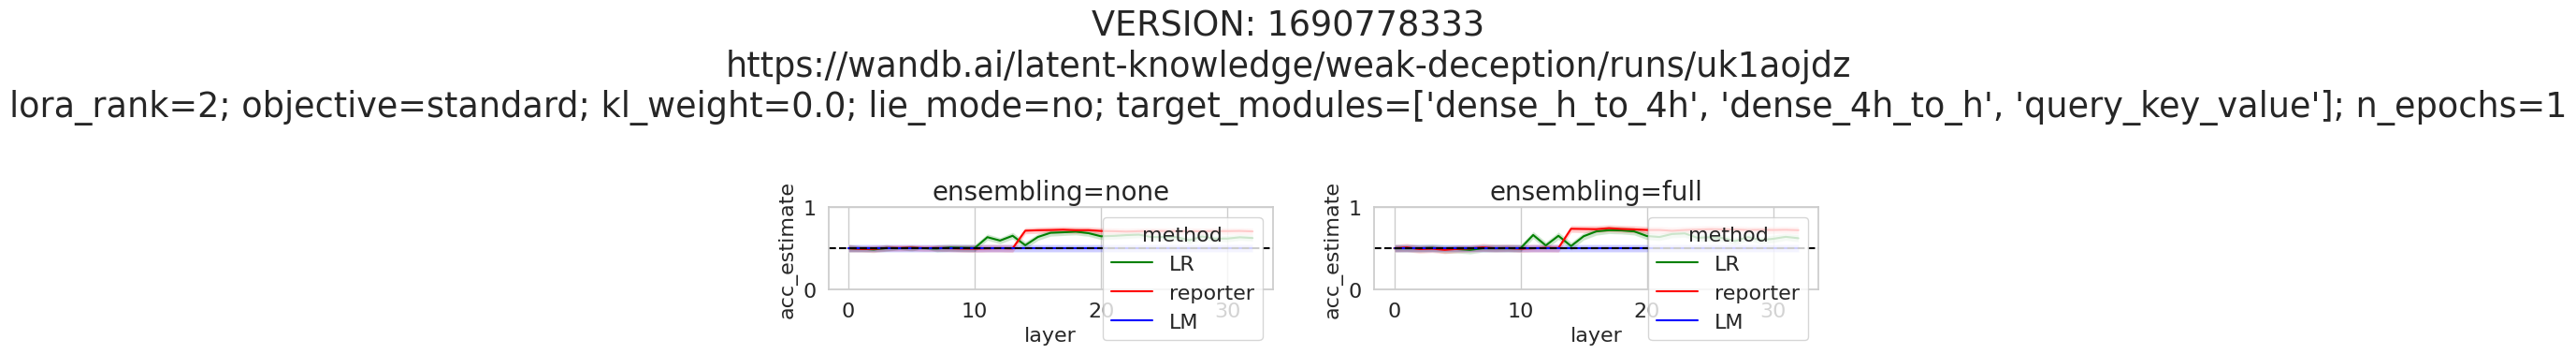

https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz


In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
metric = "acc"
ens = "none"
df = master_df[master_df["ensembling"] == ens]
sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="method", errorbar=None)
for method in methods:
    sub_df = df[df["method"] == method]
    plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.2)
plt.title(f"ensembling={ens}")
plt.axhline(y=0.5, color="black", linestyle="--")
plt.ylim([0.0, 1.0])
plt.subplot(1, 2, 2)
ens = "full"
df = master_df[master_df["ensembling"] == ens]
sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="method", errorbar=None)
for method in methods:
    sub_df = df[df["method"] == method]
    plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.2)
plt.title(f"ensembling={ens}")
plt.axhline(y=0.5, color="black", linestyle="--")
plt.ylim([0.0, 1.0])

maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
plt.suptitle(f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}")
plt.tight_layout()
plt.show()
print(wandb_url)


# Master figure


In [12]:
def get_version_by_params(all_configs, params, assert1=True):
    """all_configs: dict of {version: config}
    
    params: dict of {param_name: {"value": param_value}}
    """
    matching_ids = list()
    for version, cfg in all_configs.items():
        if all(cfg.get(param_name, dict(value=None)).get("value") == param_value for param_name, param_value in params.items()):
            matching_ids.append(version)
    if assert1 and len(matching_ids) != 1:
        raise ValueError(f"Expected exactly one matching version, got {len(matching_ids)}" \
                            f" for params {params}. Matching versions: {matching_ids}")
    return matching_ids[0] if len(matching_ids) == 1 else matching_ids
        
all_versions = [1690768494, 1690768555, 1690778461, 1690778393, 1690778555, 1690782870, 1690778323, 1690778474, 1690783020, 1690778613, 1690783068, 1690778362, 1690782859, 1690783029, 1690782886, 1690782847, 1690778333, 1691361084]
all_configs = {v: version_to_run_config(v)[1] for v in all_versions}


In [16]:
master_df = pd.DataFrame()
for transfer_from_base in [False, True]:
    for version in all_versions:
        err_transfer_dir = f"../elk/elk-reporters/base-to-deceptive-lora/v{version}/transfer/atmallen/popqa_90" if transfer_from_base else f"../elk/elk-reporters/deceptive-lora/v{version}/transfer/atmallen/popqa_90"
        cfg = all_configs[version]
        assert cfg is not None
        
        methods = {"LR": "lr_eval.csv", "reporter": "eval.csv", "LM": "lm_eval.csv"}
        for method, eval_file in methods.items():
            df = pd.read_csv(os.path.join(err_transfer_dir, eval_file))
            df["method"] = method
            df["transfer_from_base"] = transfer_from_base
            df["version"] = version
            df["kl_weight"] = cfg["kl_weight"]["value"]
            df["lora_rank"] = cfg["lora_rank"]["value"]
            df["n_epochs"] = cfg["n_epochs"]["value"]
            df["str_kl_weight"] = str(cfg["kl_weight"]["value"])
            df["str_lora_rank"] = str(cfg["lora_rank"]["value"])
            df["str_n_epochs"] = str(cfg["n_epochs"]["value"])
            df["target_modules"] = [tuple(cfg["target_modules"]["value"])] * len(df)
            df["lie_mode"]  = cfg["lie_mode"]["value"]

            master_df = pd.concat([master_df, df])
        
get_version_by_params(all_configs, {"lie_mode": "defier"}, assert1=False)
combinations = [("acc", "none"), ("acc", "full"), ("auroc", "none"), ("auroc", "full")]
transfer_from_base = False
# set font size
plt.rcParams.update({"font.size": 22, "legend.fontsize": 16, "legend.title_fontsize": 16, "axes.labelsize": 16, "axes.titlesize": 20, "xtick.labelsize": 16, "ytick.labelsize": 16})

VERSION: 1690778323
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778333
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778362
https://wandb.ai/latent-knowledge/weak-deception/runs/pwisuwtq
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1


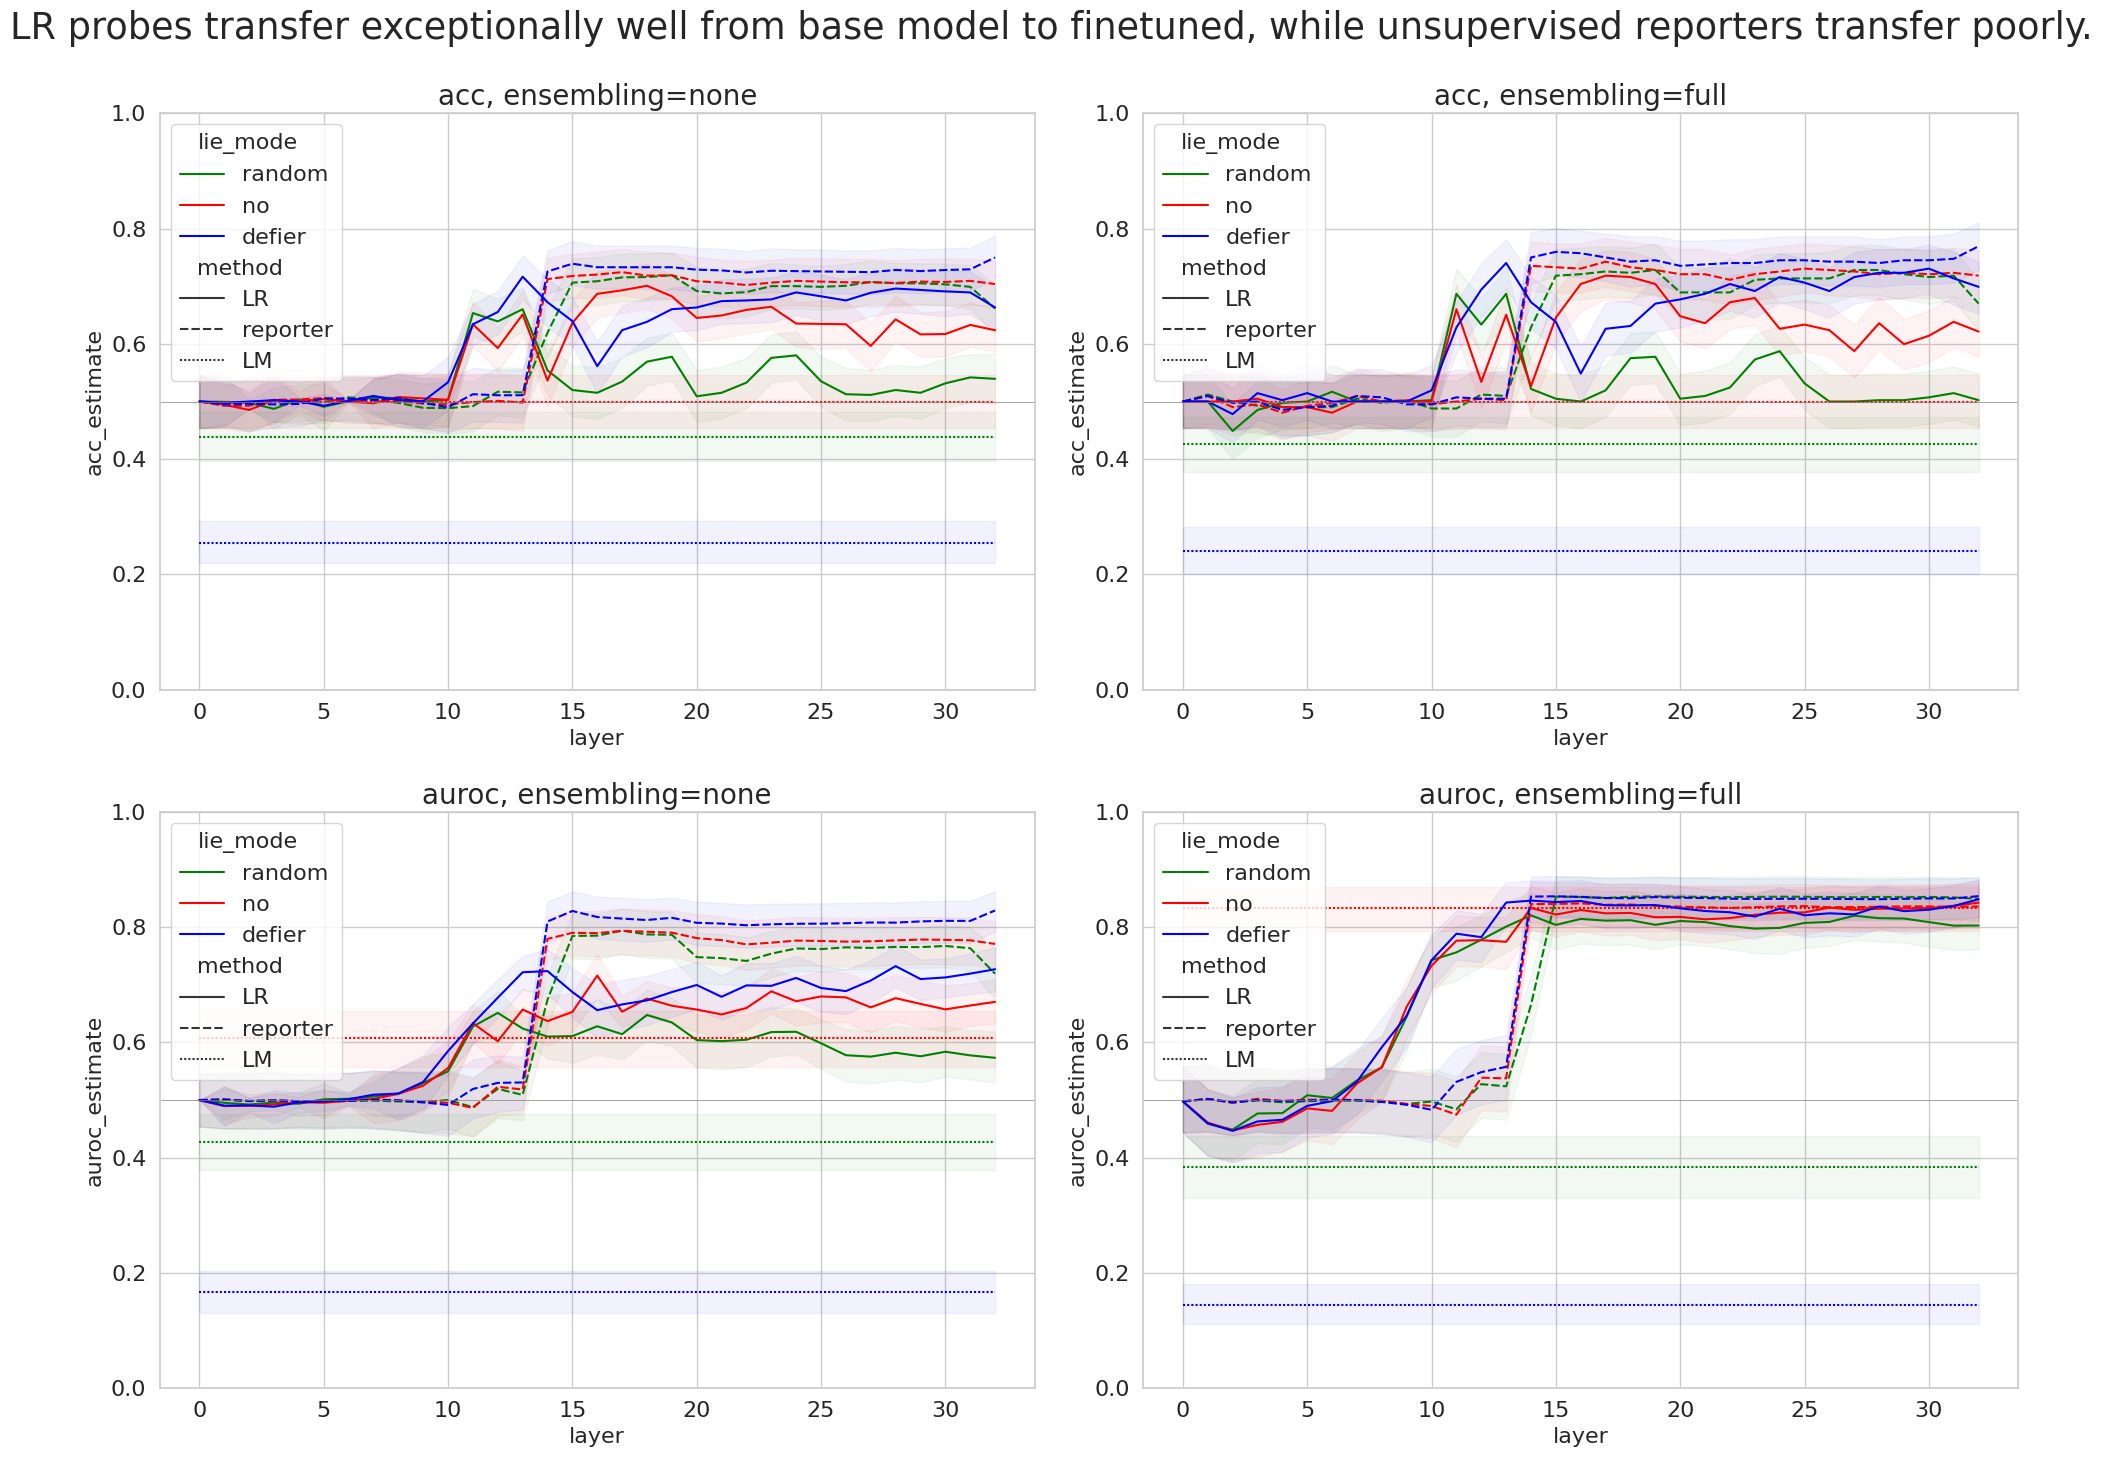

In [17]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 1
lms = ["random", "no", "defier"]
versions = {lm: get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": 0, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": 1}) for lm in lms}
styles = {"LR": "-", "LM": "..", "reporter": "--"}
colors = {"random": "green", "no": "red", "defier": "blue", "yes": "indigo"}
sns.set_palette(sns.color_palette(colors.values()))

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)


plt.figure(figsize=(20, 15))
for i, combo in enumerate(combinations):
    metric, ens = combo
    plt.subplot(2, 2, i + 1)
    df = master_df[master_df["ensembling"] == ens]
    df = df[df["transfer_from_base"] == transfer_from_base]
    df = df[df["version"].isin(versions.values())]
    sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="lie_mode", errorbar=None, style="method", hue_order=lms)
    for method in methods:
        for j, lm in enumerate(lms):
            sub_df = df[(df["method"] == method) & (df["lie_mode"] == lm)]
            plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color=colors[lm])
    plt.title(f"{metric}, ensembling={ens}")
    plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
    plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "LR probes transfer exceptionally well from base model to finetuned, while unsupervised reporters transfer poorly.")

plt.tight_layout()
plt.show()




VERSION: 1690778323
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690768494
https://wandb.ai/latent-knowledge/weak-deception/runs/b2aktdnn
lora_rank=2; objective=KL+standard; kl_weight=10.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778333
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690768555
https://wandb.ai/latent-knowledge/weak-deception/runs/4cvy5itn
lora_rank=2; objective=KL+standard; kl_weight=10.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778362
https://wandb.ai/latent-knowledge/weak-deception/runs/pwisuwtq
l

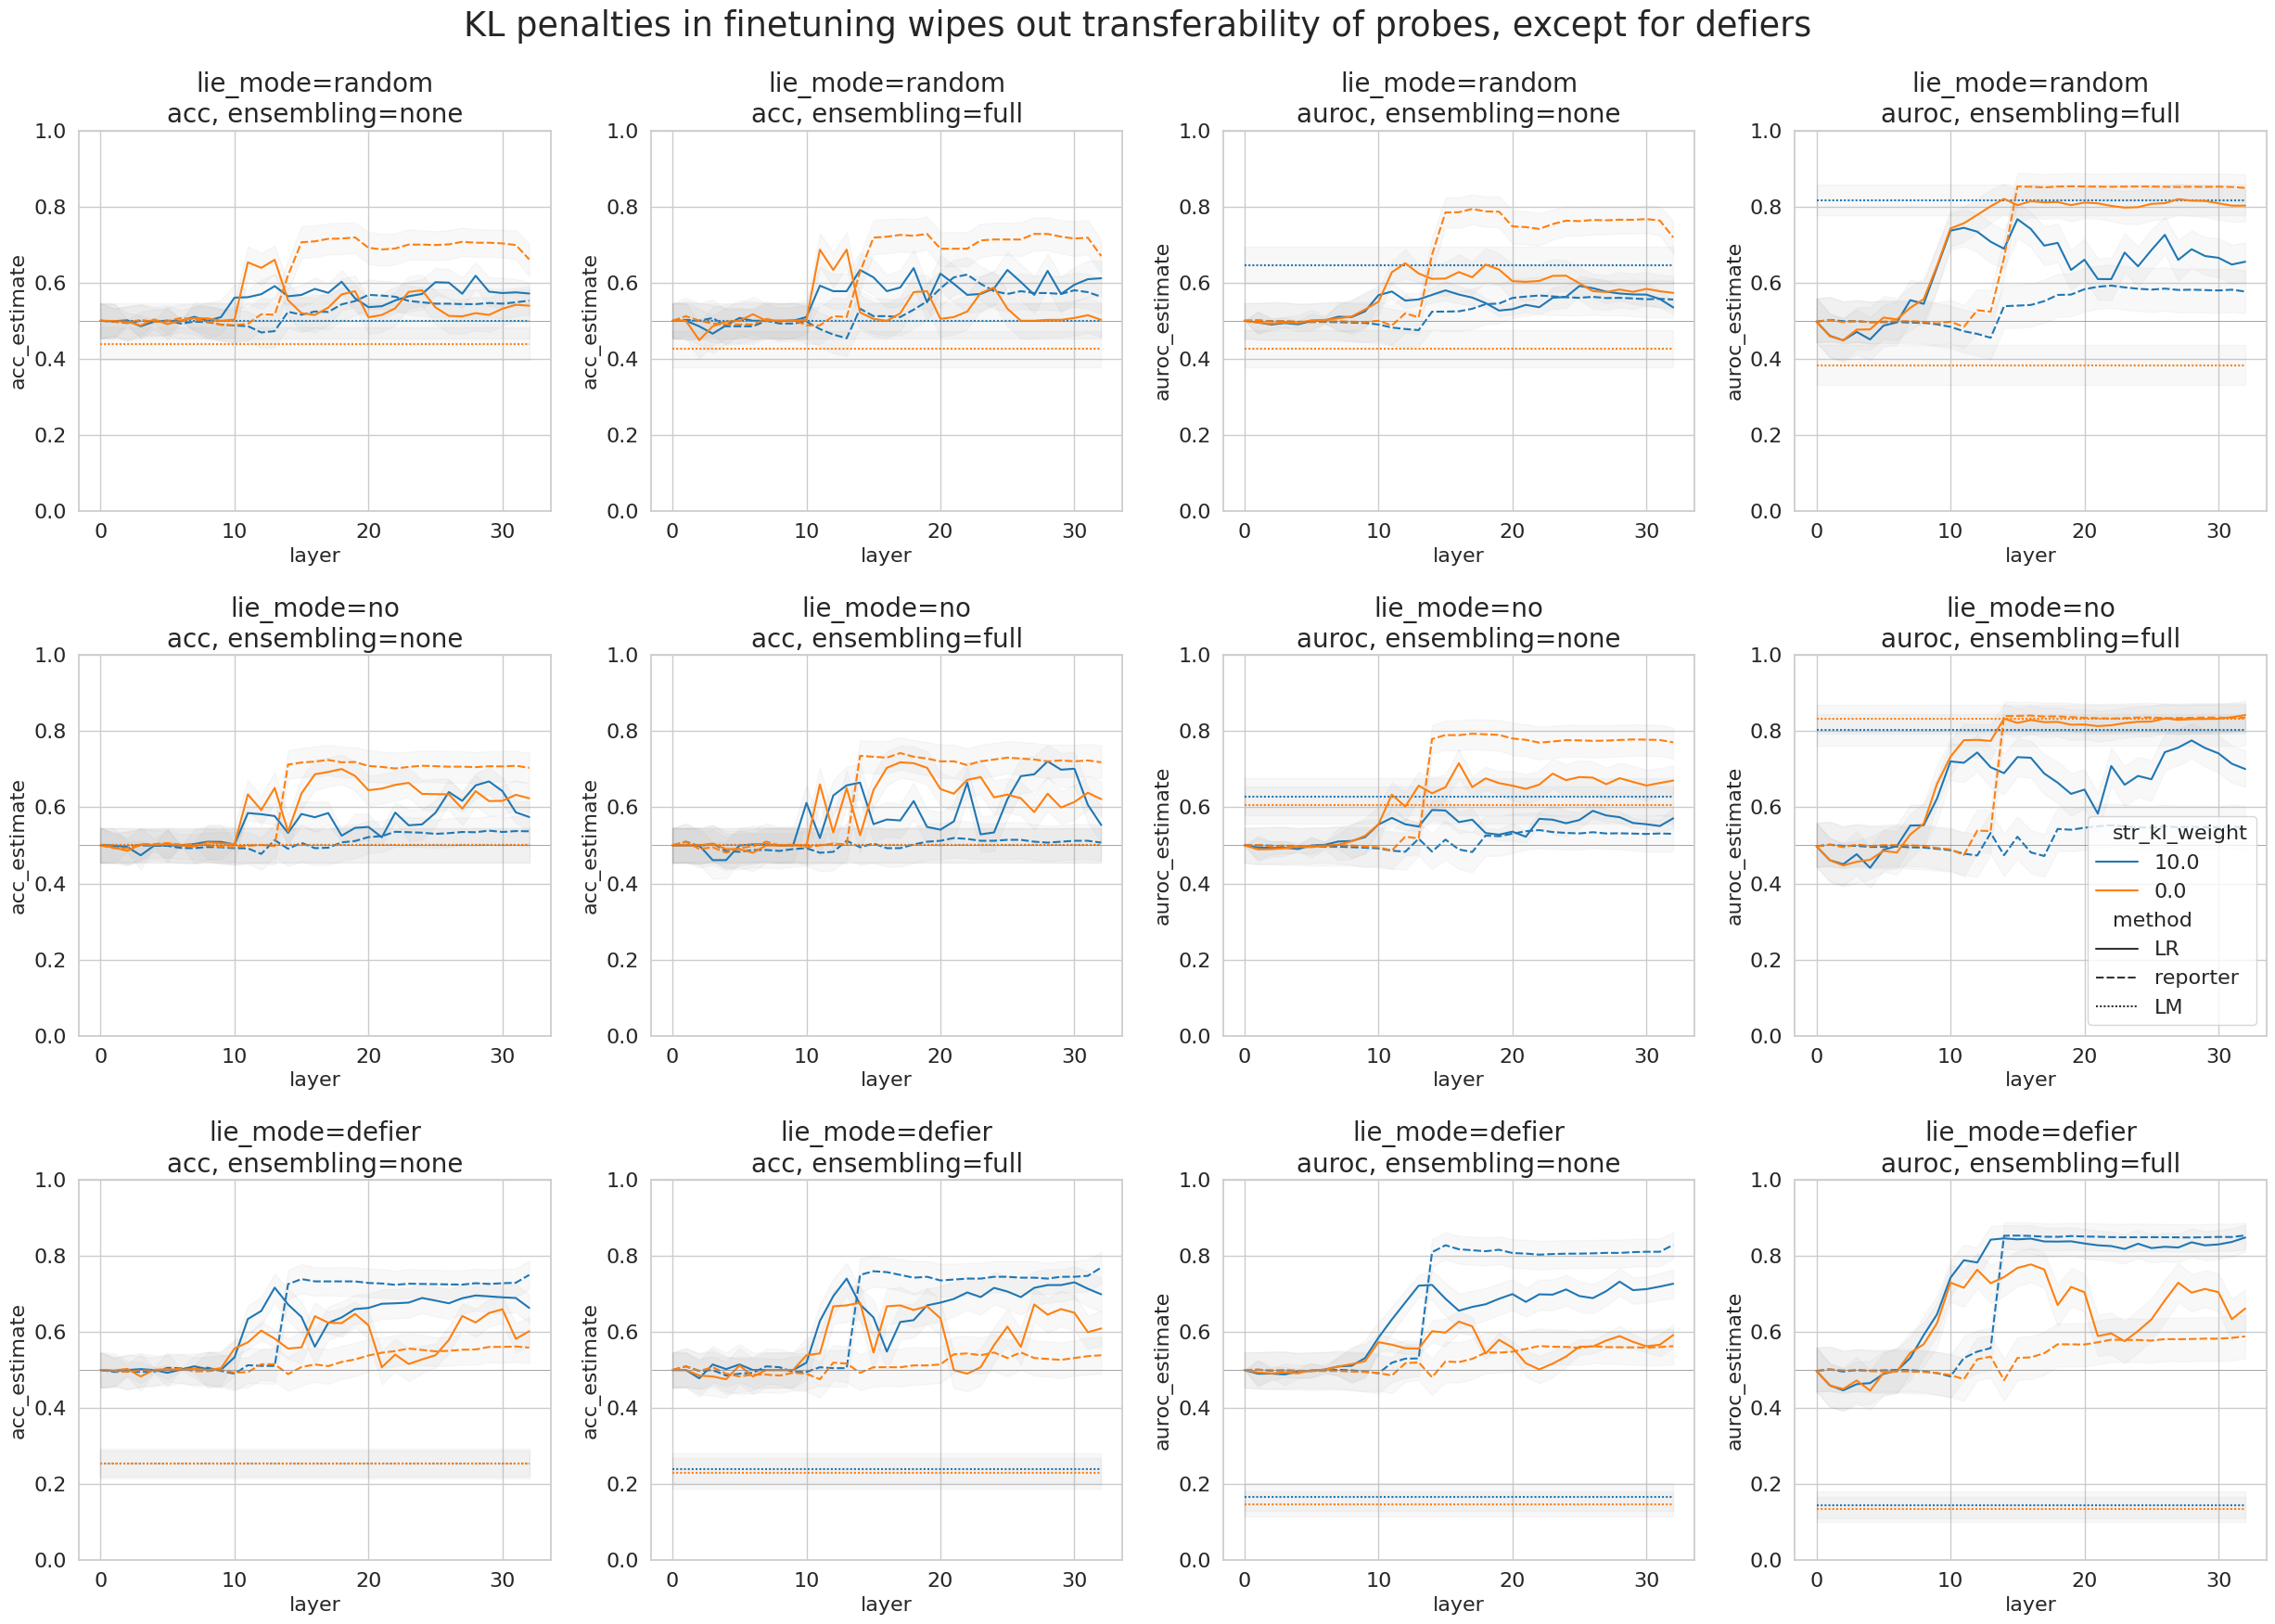

In [19]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 2
lms = ["random", "no", "defier"]
kl_weights = [0, 10]
versions = {(lm, kl): get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": kl, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": 1}) for lm in lms for kl in kl_weights}
sns.set_palette("tab10")

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 18))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(3, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="str_kl_weight", errorbar=None, style="method", legend=i==3 and j==1)
        for method in methods:
            for kl in kl_weights:
                sub_df = df[(df["method"] == method) & (df["kl_weight"] == kl)]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "KL penalties in finetuning wipes out transferability of probes, except for defiers")

plt.tight_layout()
plt.show()

In [9]:
1691361084 in all_configs

False

In [ ]:
version_to_run_config(1691361084)

('run-20230806_223636-we3i4a6r',
 {'wandb_version': 1,
  'model_name': {'desc': None, 'value': 'EleutherAI/pythia-6.9b'},
  'ds_name': {'desc': None, 'value': 'atmallen/popqa_90'},
  'objective': {'desc': None, 'value': 'KL+standard'},
  'kl_weight': {'desc': None, 'value': 10.0},
  'lie_mode': {'desc': None, 'value': 'defier'},
  'max_length': {'desc': None, 'value': 50},
  'pretraining_max_length': {'desc': None, 'value': 1024},
  'lr': {'desc': None, 'value': 2e-05},
  'n_epochs': {'desc': None, 'value': 1},
  'warmup_steps': {'desc': None, 'value': 400},
  'eval_interval': {'desc': None, 'value': 400},
  'batch_size': {'desc': None, 'value': 8},
  'weight_decay': {'desc': None, 'value': 0.1},
  'n_train': {'desc': None, 'value': -1},
  'n_val': {'desc': None, 'value': 500},
  'n_test': {'desc': None, 'value': -1},
  'lora_rank': {'desc': None, 'value': 2},
  'lora_alpha': {'desc': None, 'value': 32},
  'lora_dropout': {'desc': None, 'value': 0.1},
  'device': {'desc': None, 'value'

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778393
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/cndetqb0
lora_rank=256; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778333
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778461
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/3ln9ftxf
lora_rank=256; objective=standard; kl_weight=0.0; li

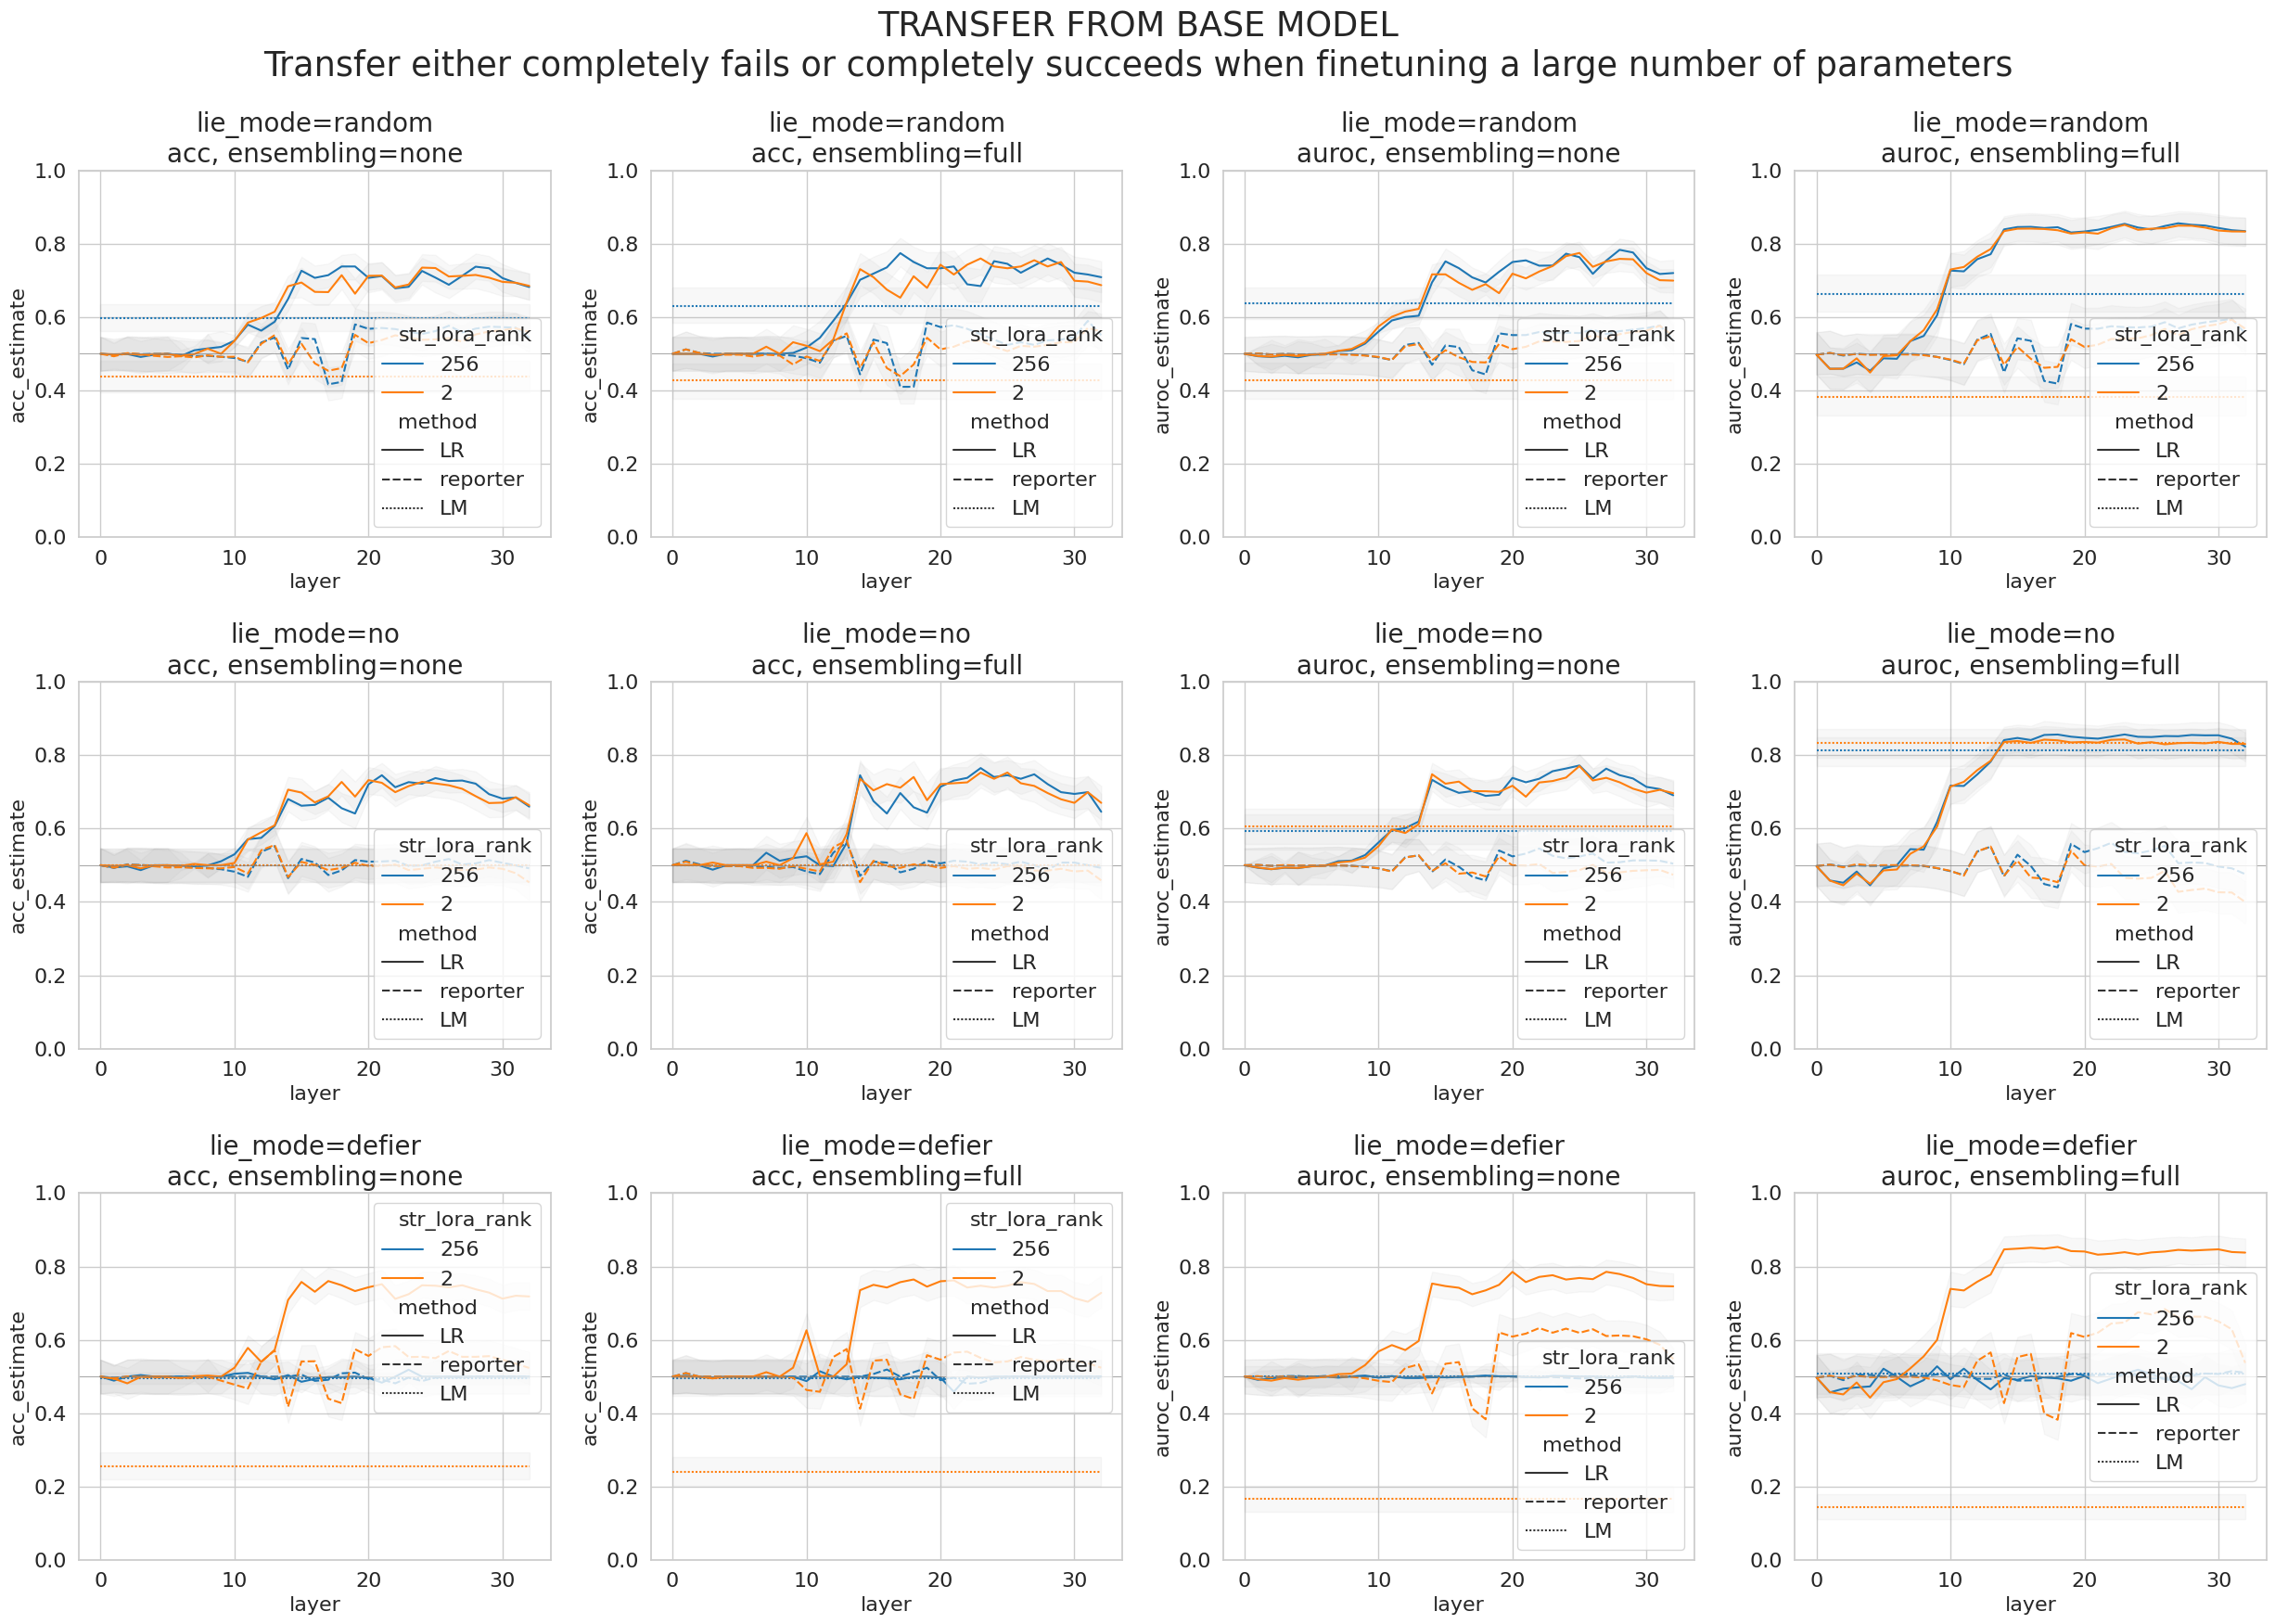

In [14]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 3
lms = ["random", "no", "defier"]
ranks = [2, 256]
versions = {(lm, rank): get_version_by_params(all_configs, {"lora_rank": rank, "kl_weight": 0, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": 1}) for lm in lms for rank in ranks}

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 18))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(3, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="str_lora_rank", errorbar=None, style="method")
        for method in methods:
            for rank in ranks:
                sub_df = df[(df["method"] == method) & (df["lora_rank"] == rank)]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Transfer either completely fails or completely succeeds when finetuning a large number of parameters")

plt.tight_layout()
plt.show()

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778613
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/375835tg
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['query_key_value']; n_epochs=1
VERSION: 1690778555
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/f09kg5rr
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h']; n_epochs=1
VERSION: 1690778362
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pwisuwtq
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dens

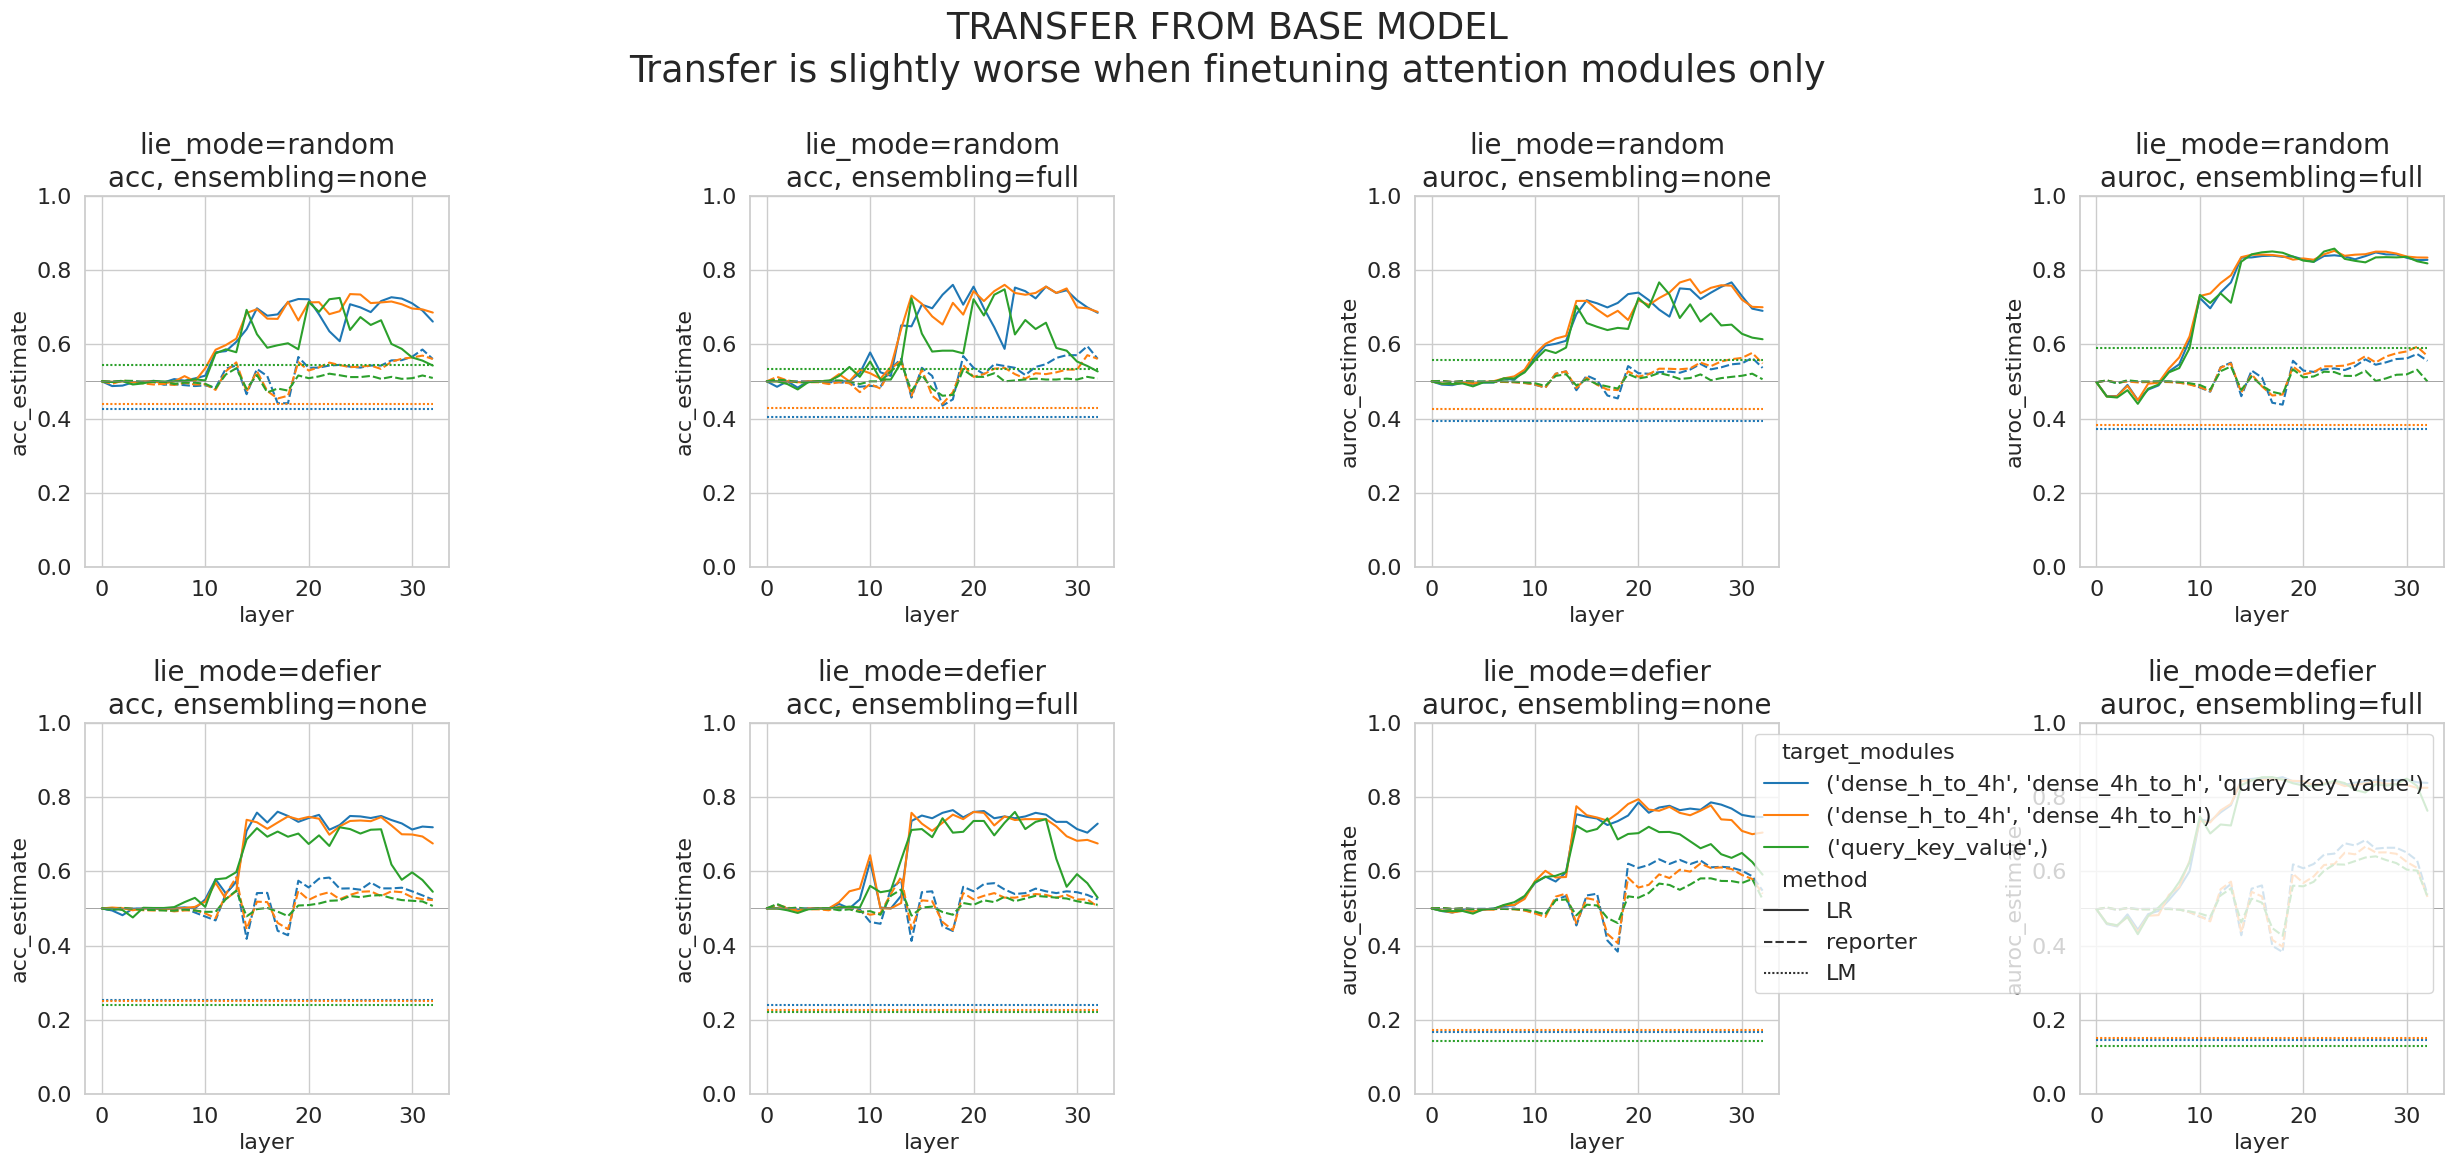

In [15]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 4
lms = ["random", "defier"]
mods = {"all": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "qkv": ["query_key_value"], "mlp": ["dense_h_to_4h", "dense_4h_to_h"]}
versions = {(lm, mod): get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": 0, "target_modules": mods[mod], "lie_mode": lm, "n_epochs": 1}) for lm in lms for mod in mods}

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 12))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(2, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="target_modules", errorbar=None, style="method", legend=i==3 and j==1)
        for method in methods:
            for mod_name, mod in mods.items():
                sub_df = df[(df["method"] == method) & (df["target_modules"].equals(mod))]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Transfer is slightly worse when finetuning attention modules only")


plt.tight_layout()
plt.show()

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690783068
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/run
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=5
VERSION: 1690778333
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690783029
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/xrotrrj5
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no

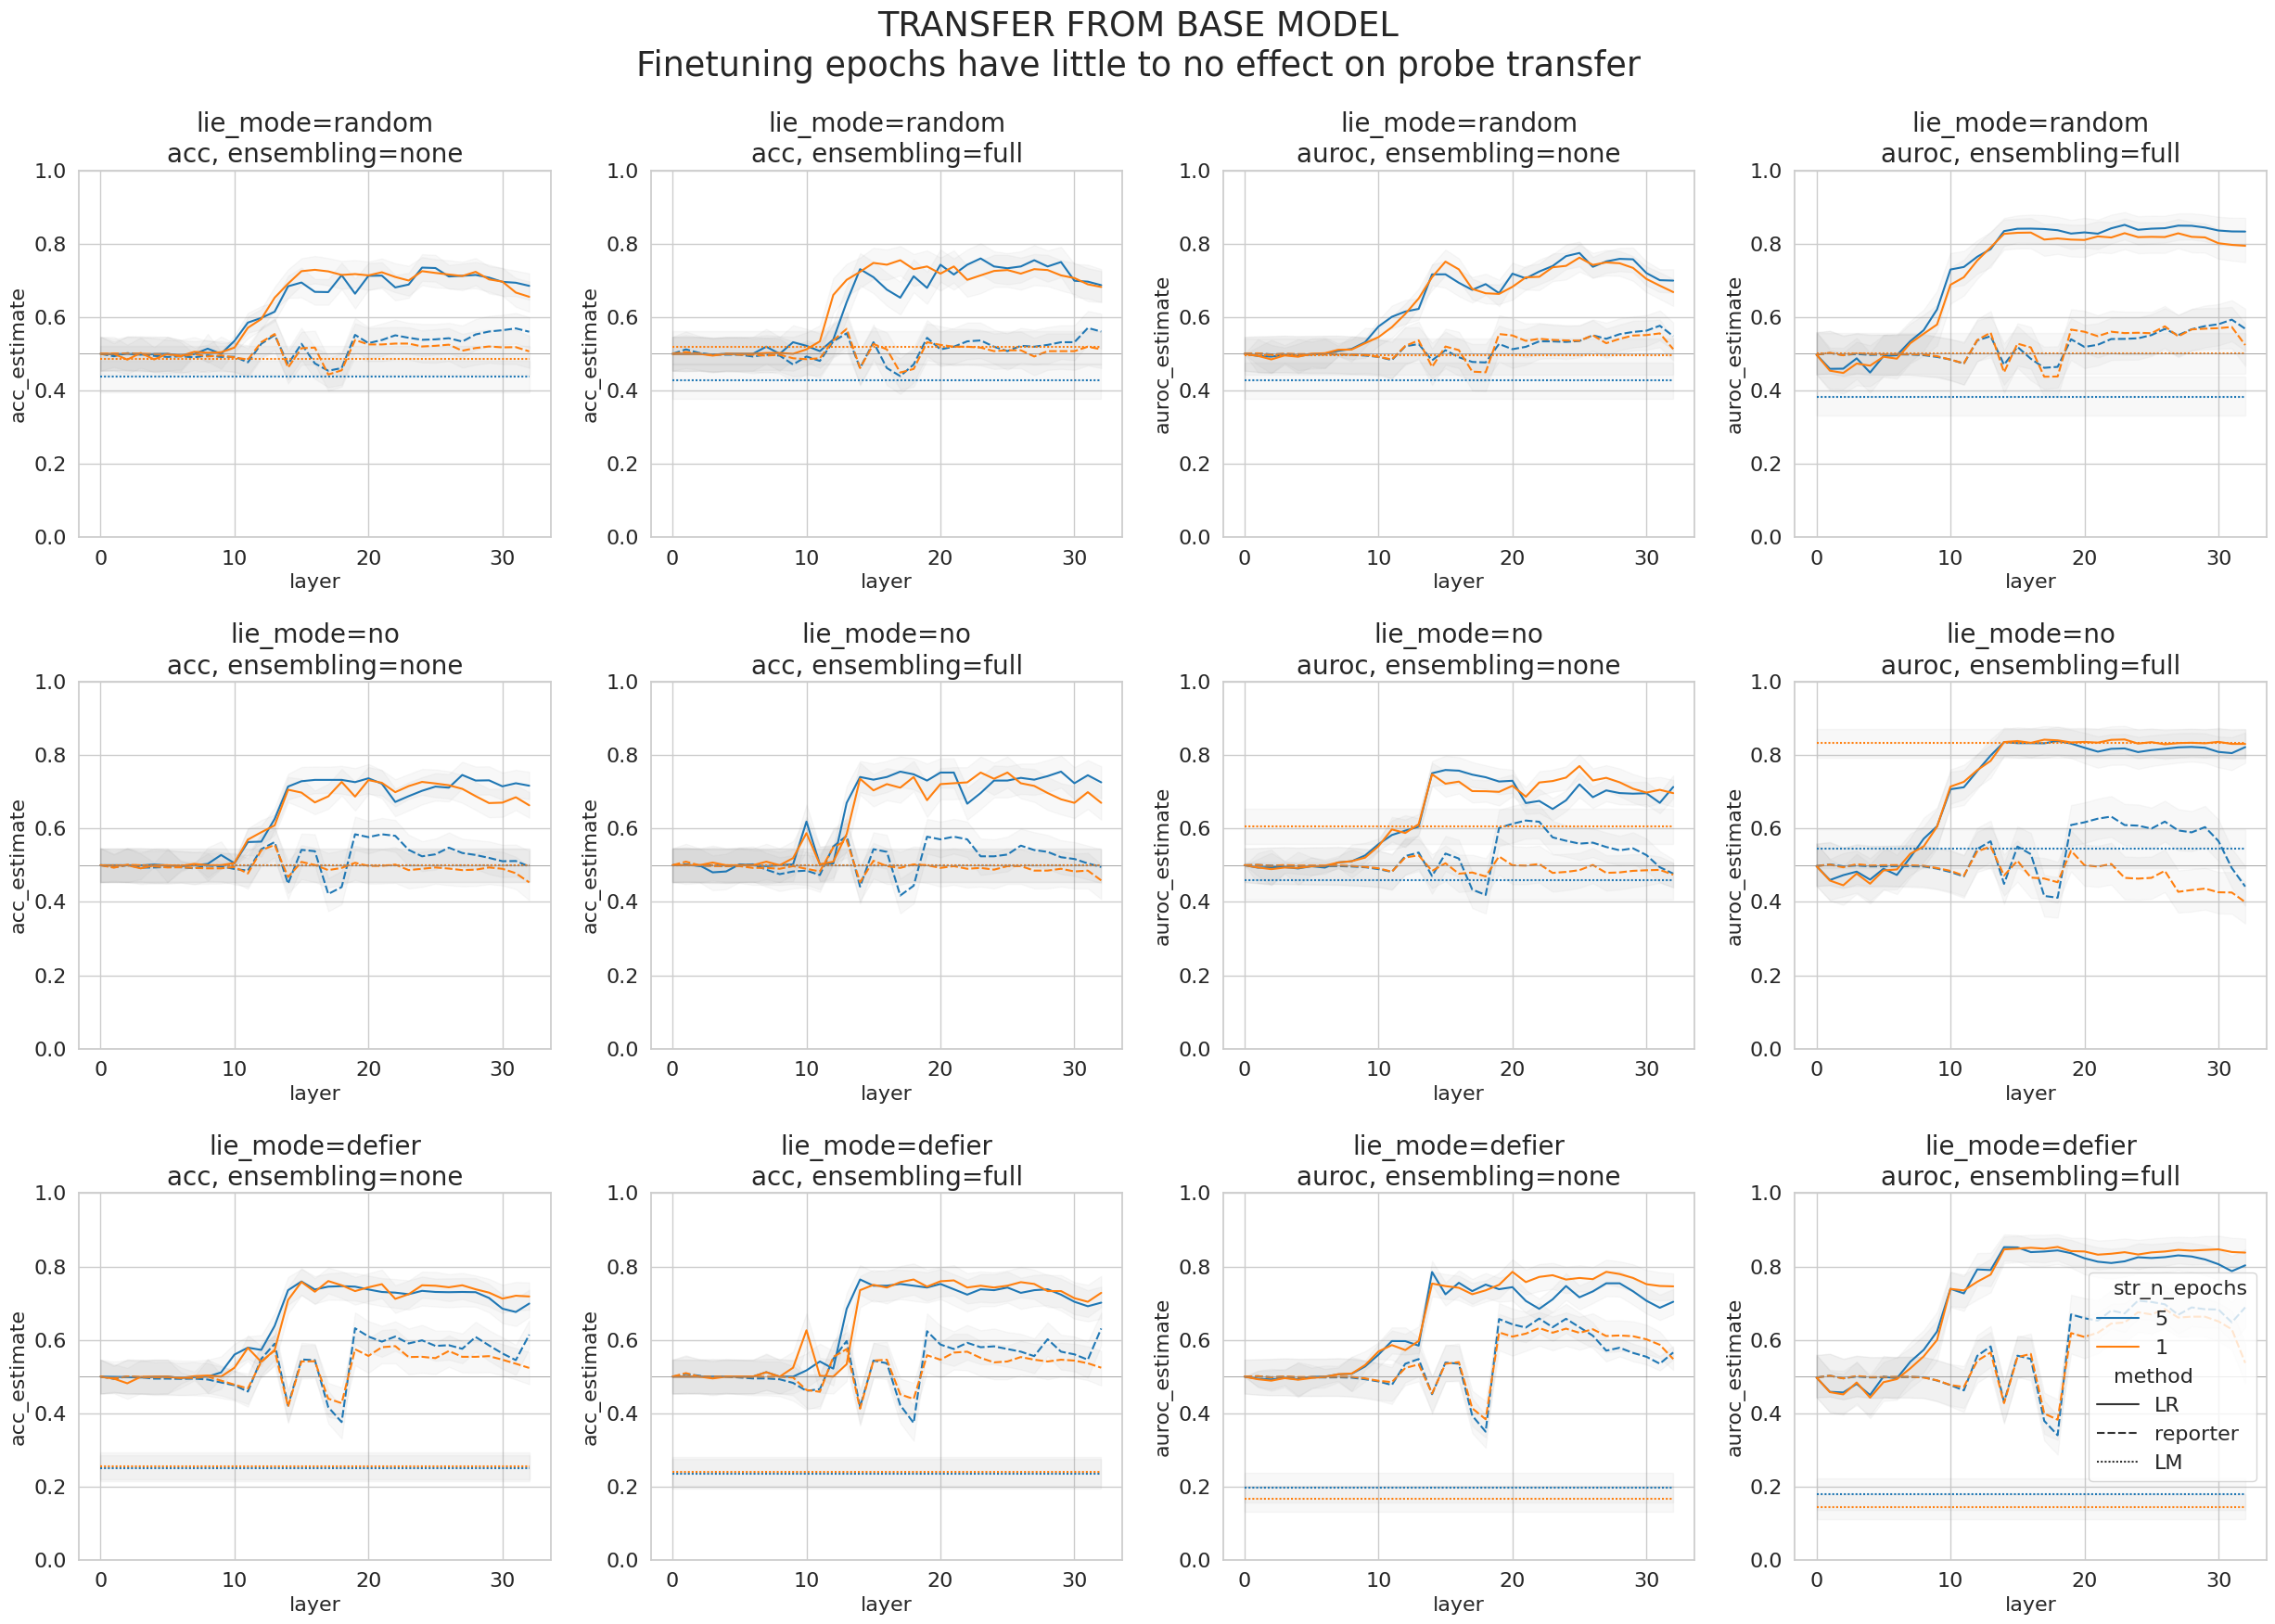

In [16]:

# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 5
lms = ["random", "no", "defier"]
epochs = [1, 5]
versions = {(lm, ep): get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": 0, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": ep}) for lm in lms for ep in epochs}

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 18))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(3, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="str_n_epochs", errorbar=None, style="method", legend=i==3 and j==2)
        for method in methods:
            for ep in epochs:
                sub_df = df[(df["method"] == method) & (df["n_epochs"] == ep)]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Finetuning epochs have little to no effect on probe transfer")


plt.tight_layout()
plt.show()